# Tutorial de como trabalhar com a biblioteca Seaborn

    Utilizando dados de contas/gorjetas... de uma 'Cafeteria'
    Na verdade, não contextualizei o suficiente, mas como o objetivo
    era conhecer os métodos existentes não há tanta necessidade de um
    contexto específico.

Esse vídeo me ajudou: https://www.youtube.com/watch?v=CWhFc5zjzWY&list=WL&index=12&t=601s

link bem útil sobre paletas de cores, confere: http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

## Planejamento
    .relplot()
    .scatterplot()
    Redimensionando Figuras
    Cores 
    .catplot()
    Scatter plot com dados categóricos
    Gráficos com Regressão
    Boxplot
    Gráficos de Correlação .heatmap()

In [177]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# DataFrame disponibilizado pela própria seaborn

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### .relplot()

    Método de alto nível para visualização de relaçoes estatísticas entre variáveis.
    O método relplot() já combina o scatter plot e line plots.
    Muito útil para ver relações entre duas ou mais variáveis com o uso de parâmetros
    de semântica dos dados.

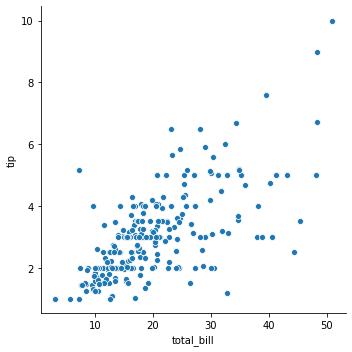

In [26]:
# Visualizando a relação entre a variável valor total da conta e gorjeta.

''' Vemos que quanto mais alta a conta, mais cara a gorjeta '''

sns.relplot(x='total_bill', y='tip', data=tips)

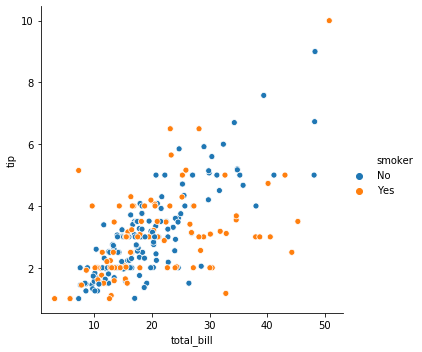

In [28]:
''' 
    A disperção do total da conta pela gorjeta + se o cliente é fumante ou não
    hue define uma subdivisão dos dados (usando as cores). O eixo X (horizontal)
    se divide em valores das contas, o hue (nesse caso) divide essas contas por
    ser fumante ou não...
'''

sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

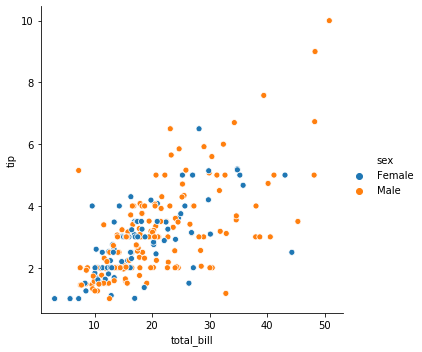

In [30]:
''' Podemos fazer o mesmo, mas subdividindo em sexo '''

sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

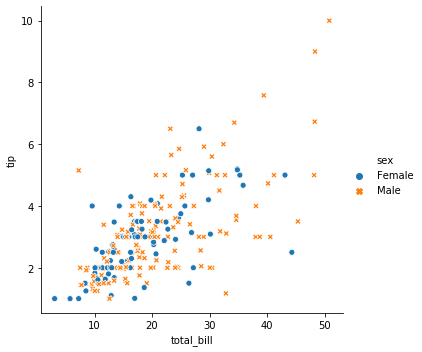

In [32]:
''' 
    Podemos alterar o marcador dos pontos usando o parâmetro style.
    Então, havendo mais que duas categorias, outros marcadores apareceriam
    para diferenciar as classes.
'''

sns.relplot(x="total_bill", y="tip", hue="sex", style="sex", data=tips);

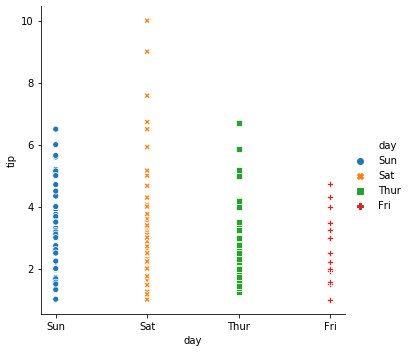

In [48]:
''' Exemplo, apenas para demostração'''

sns.relplot(x="day", y="tip", hue="day", style="day", data=tips);

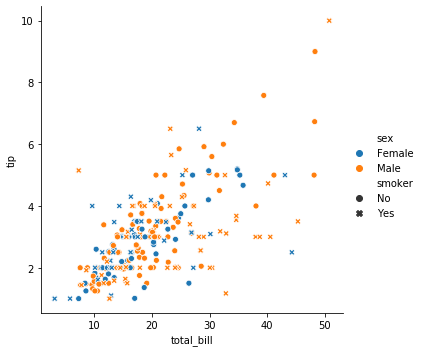

In [51]:
'''
     É possível também agregar várias variáveis, mas dessa maneira corremos o risco
     de criar um gráfico poluído, sem clareza e, consequentemente, tendo que nos 
     esforçar bem mais para compreendê-lo
     
'''

sns.relplot(x="total_bill", y="tip", hue="sex", style="smoker", data=tips);

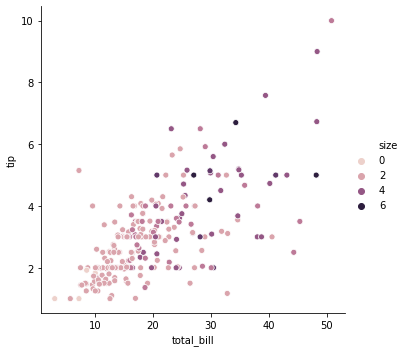

In [54]:
'''
    Em casos de variáveis numéricas para definir as cores das subclasses,
    ao invés de cores diferentes para cada subclasse (azul, verde, amarelo...)
    a tonalidade da paleta de cores é que será alterada.
    
    Ou seja: o tamanho da compra se altera de acordo com a tonalidade da cor.
'''

sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

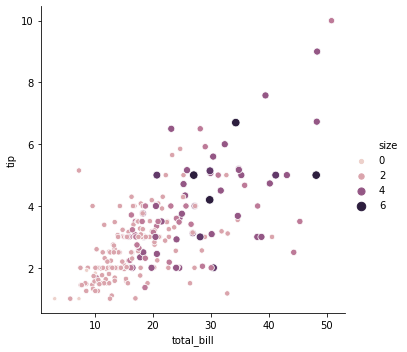

In [58]:
'''
    O parâmetro size define o tamanho de cada ponto baseado em alguma coluna
    da base de dados. E também dá para alterar o size/tamanho dos pontos...
'''

sns.relplot(x="total_bill", y="tip", hue="size", size="size", data=tips);

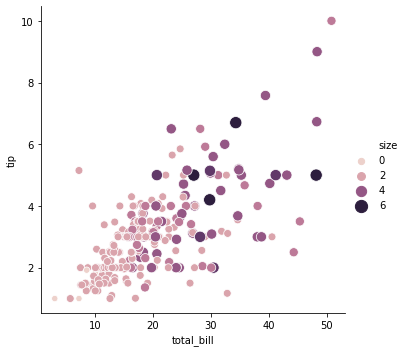

In [63]:
''' Com o parâmetro sizes mudamos o tamanho de acordo com um range '''

sns.relplot(x="total_bill", y="tip", hue="size", size="size", sizes=(40,150), data=tips);

### Scatterplot
    Caso não queira usar .relplot() o método .scatterplot() já atende
    perfeitamente quando queremos ver relações nos dados.
    A única diferença é que o scatterplot plota gráfico de dispersão apenas,
    logo este não contém a função .lineplot() 

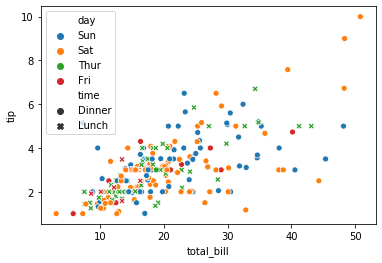

In [65]:
''' Com muitas variáveis, o gráfico acaba ficando confuso de se entender '''

sns.scatterplot(x="total_bill", y="tip", hue="day", style="time", data=tips)

### Redimensionando Figuras 
    Como a seaborn foi construída baseada no matplotlib, essas duas bibliotecas
    funcionam muito bem juntas, em outras palavras, conseguimos aplicar métodos
    da matplotlib mesmo criando os gráficos com a seaborn

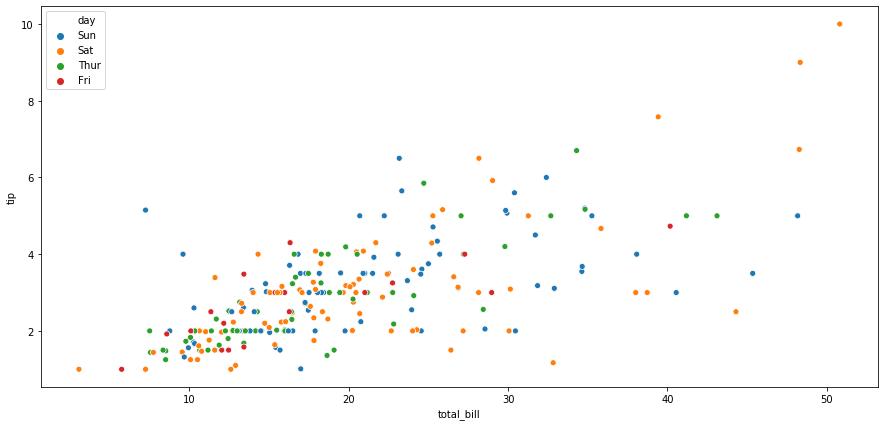

In [72]:
'''
    uma das maneiras de se alterar o tamanho da figura é usando .figure()
    e o parâmetro figsize
'''

plt.figure(figsize=(15, 7))

sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)

### Cores
    A função que controla as cores no seaborn é a .color_palette()
    Ela fornece uma interface para gerar cores.
    
    O metodo color_palette() recebe o nome de uma paleta de cores do
    seaborn ou um colormap do matplotlib.
    
    O metodo set_palette() recebe os mesmos parametros e é usado para
    definir um estilo padrão para todos os plots.
    
    Obs: as cores devem ser definidas levando em consideracao o tipo de 
    dado que queremos plotar: qualitativos, sequenciais, diverging...
    
    
    *Ferramenta Color Brewer 2.0 *
http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

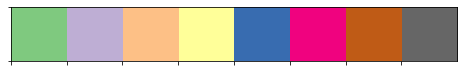

In [79]:
# Paleta de cores para dados Quantitativos (valores numéricos)

sns.palplot(sns.color_palette("Accent"))

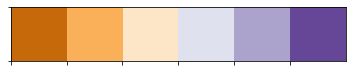

In [75]:
# Paleta de cores para dados divergentes

sns.palplot(sns.color_palette("PuOr"))

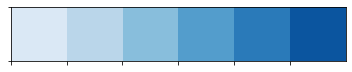

In [76]:
# Paleta de cores para dados sequenciais

sns.palplot(sns.color_palette("Blues"))

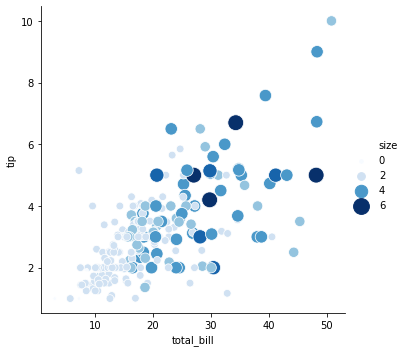

In [86]:
# Gráfico usando a paleta de cor sequencial "Blues"

sns.relplot(x="total_bill", y="tip", hue="size", palette="Blues", size="size", sizes=(12,250), data=tips);

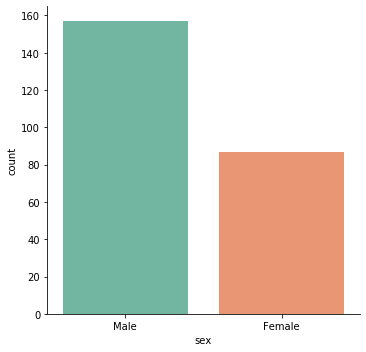

In [87]:
# Gráfico usando a paleta de cor qualitativa "Set2" (Categorias) 

sns.catplot(x="sex", kind="count", palette="Set2", data=tips);

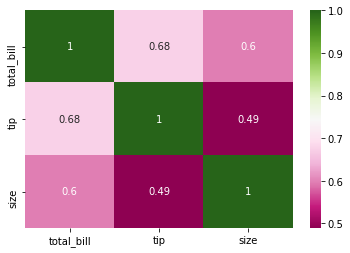

In [88]:
# Gráfico usando a paleta de cor divergente "PiYG" (correlações)

sns.heatmap(tips.corr(), annot=True, cmap="PiYG")

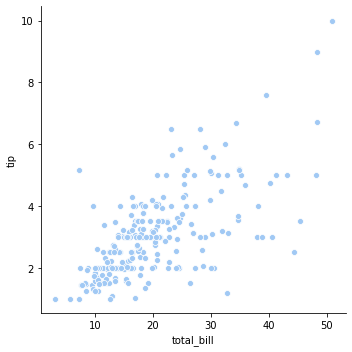

In [91]:
# Definindo cores padrão para gráficos Searborn

# plot usando a paleta de cor "pastel" (funciona semelhantemente ao plt.figure())
sns.set_palette("pastel")

sns.relplot(x="total_bill", y="tip", data=tips);

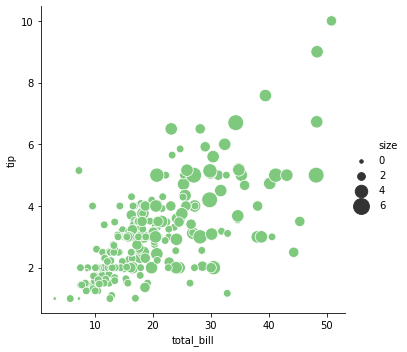

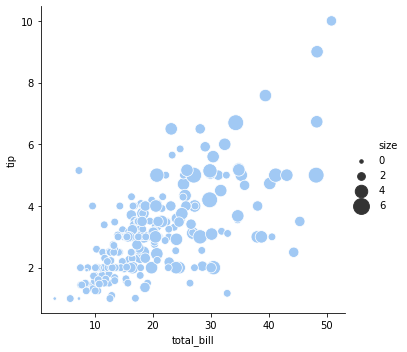

In [97]:
# Instrução 'with' para definir cor temporariamente

with sns.color_palette("Accent"):
    sns.relplot(x="total_bill", y="tip", size="size", sizes=(12,250), data=tips);

# Por estar fora do 'with' este usará sns.set_palette("pastel") do gráfico anterior   
sns.relplot(x="total_bill", y="tip", size="size", sizes=(12,250), data=tips);

### .catplot()
    Gráficos categóricos/ de barra

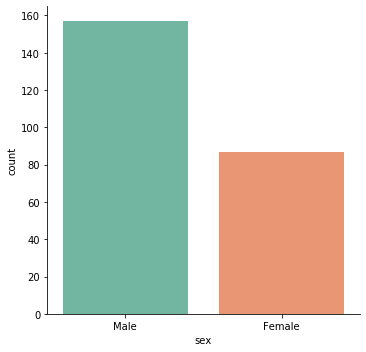

In [98]:
sns.catplot(x="sex", kind="count", palette="Set2", data=tips);

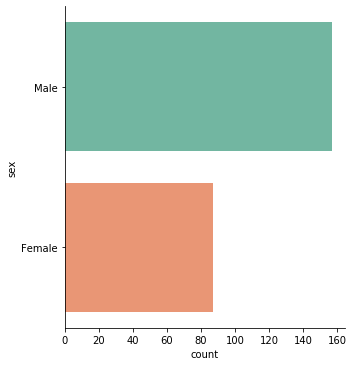

In [100]:
# Trocando o Eixo x pelo y, podemos horizontalizar o gráfico

sns.catplot(y="sex", kind="count", palette="Set2", data=tips);

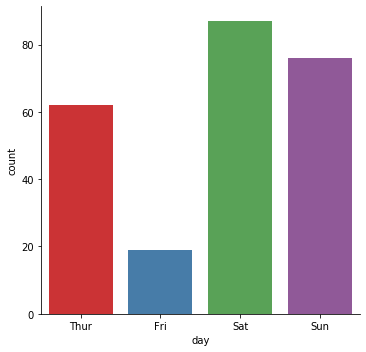

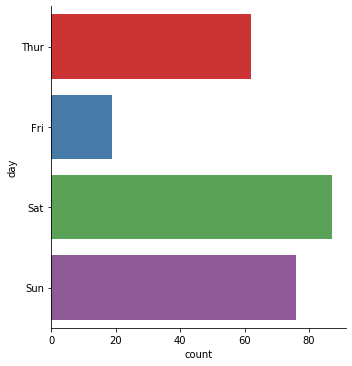

In [129]:
# O mesmo aqui
sns.catplot(x="day", kind="count", palette="Set1", data=tips);
sns.catplot(y="day", kind="count", palette="Set1", data=tips);

#### Scatter plot com dados categóricos

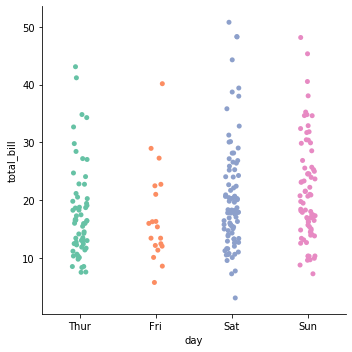

In [130]:
sns.catplot(x="day", y="total_bill", palette="Set2", data=tips);

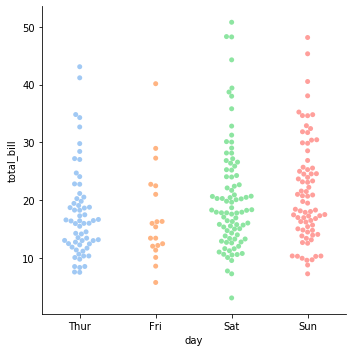

In [132]:
# O parâmetro swarm evita sobreposição de pontos
'''
    Agora conseguimos ver que a maioria das contas da quinta-feira (Thur)
    estão entre 10 e 20 dólares
    
'''

sns.catplot(x="day", y="total_bill", kind='swarm', data=tips);

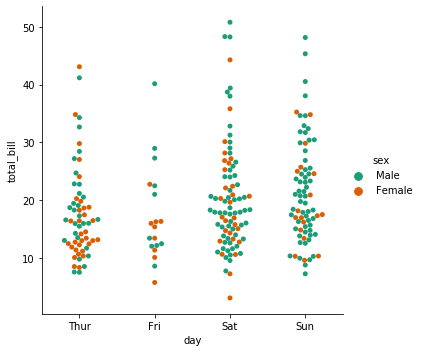

In [134]:
'''
    O parâmetro 'hue' permite (como já dito antes) adicionarmos uma 
    terceira variável a nossa visualização.
'''

sns.catplot(x="day", y="total_bill", kind='swarm', hue="sex", palette="Dark2", data=tips);

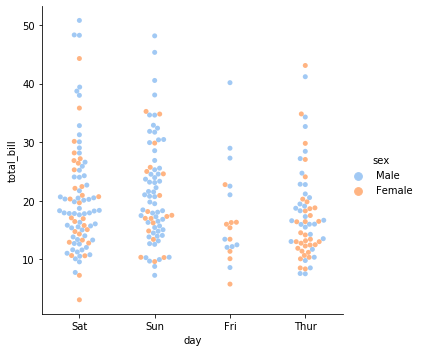

In [136]:
'''
    O parâmetro 'order' permite alterarmos a ordem padrão das categorias que estão sendo exibidas.
    Isso é útil quando temos mais de um gráfico na mesma figura e queremos manter as mesmas ordens.
'''

sns.catplot(x="day", y="total_bill", kind='swarm', hue="sex", order=['Sat','Sun','Fri','Thur'], data=tips);

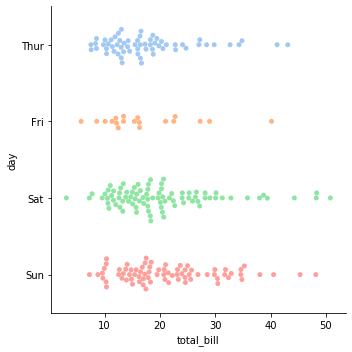

In [140]:
# Invertendo novamente a visualização para plot horizontal

sns.catplot(x="total_bill", y="day", kind="swarm", data=tips);

### Gráficos com Regressão
    Quando temos muitas variáveis quantitativas em nossos dados 
    é interessante visualizar como estas se relacionam.
    E podemos visualizar essas informações com linhas de regressão.
    Com modelos de regressão simples é possível checar se existe 
    alguma correlacão entre algumas variáveis.

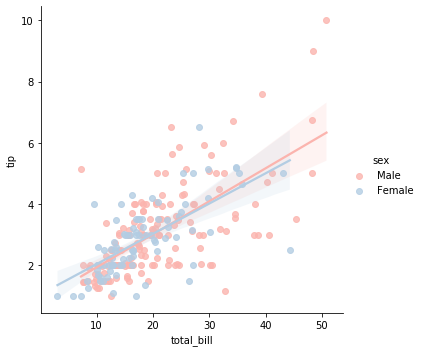

In [145]:
# .lmplot() exibe a linha de regressão para visualizar a dispersão entre as variáveis

sns.lmplot(x="total_bill", y="tip", hue="sex", palette="Pastel1", data=tips);

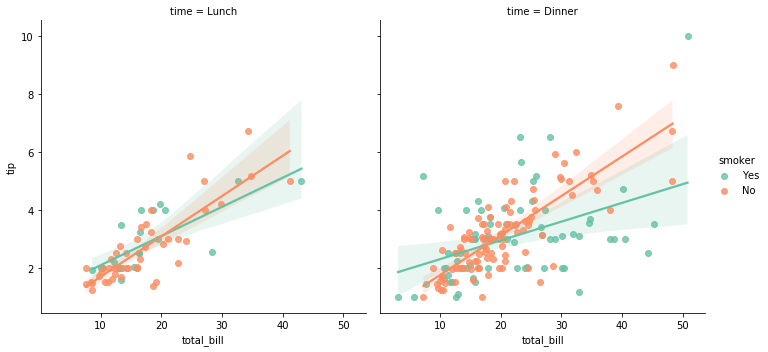

In [148]:
# O parâmetro col segrega os gráficos pelo valor da coluna escolhida (nesse caso: "time")

sns.lmplot(x="total_bill",y="tip", hue="smoker", col="time", palette="Set2", data=tips);

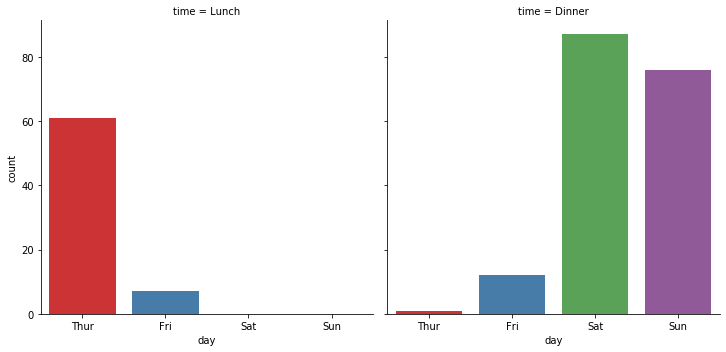

In [170]:
''' 
    Usando a mesma estrutura no gráfico das vendas pelos dias, perceba que
    quinta e sexta vendem mais durante o lunch/almoço.
    Já sabádo e domingo têm mais pessoas saindo para jantar.
    
'''
sns.catplot(x="day", kind="count", col='time', palette="Set1", data=tips);

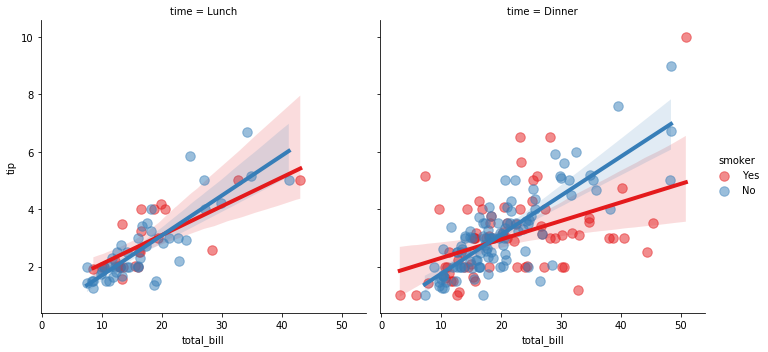

In [149]:
# Parâmetros scatter_kws e line_kws

sns.lmplot(x="total_bill",
           y="tip", 
           hue="smoker", 
           col="time", 
           palette="Set1",
           data=tips, 
           scatter_kws={'s': 90, 'alpha': 0.5},  # s = tamanho dos pontos  alpha = transparência
           line_kws={'lw': 4});                  # espessura das linhas

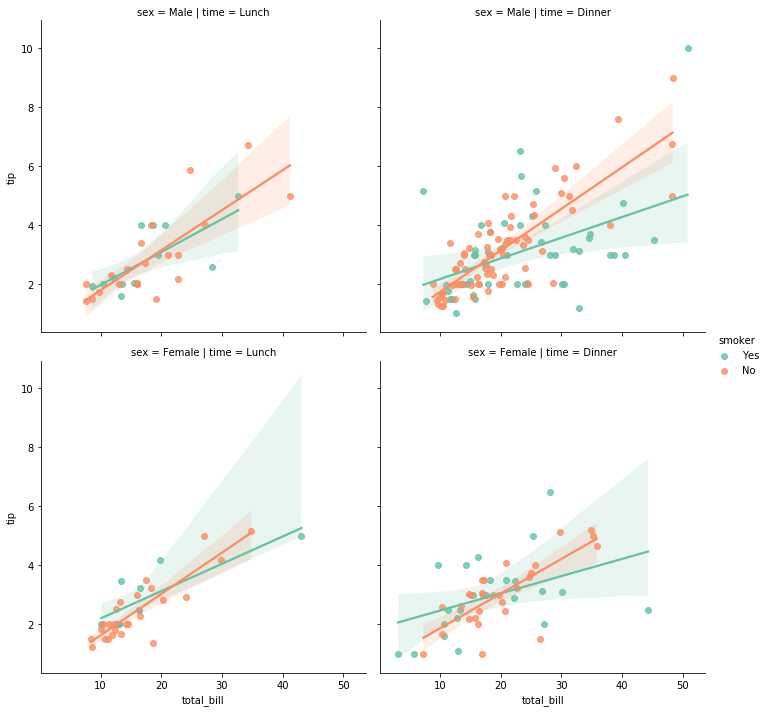

In [151]:
# Segregando gráficos pelo parâmetro col e pelo parâmetro row 
'''
    Além de separar por um parâmetro específico ("time"), podemos separar por outro (nesse caso
    "sex")
'''

sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", palette="Set2", data=tips);

### Boxplot
    Excelente para visualizar Outliers/ os pontos fora da curva.

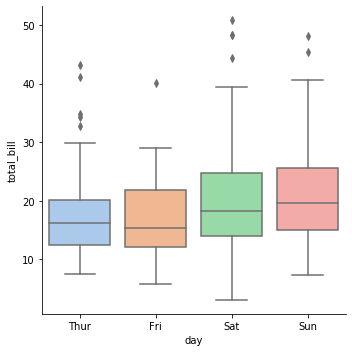

In [153]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

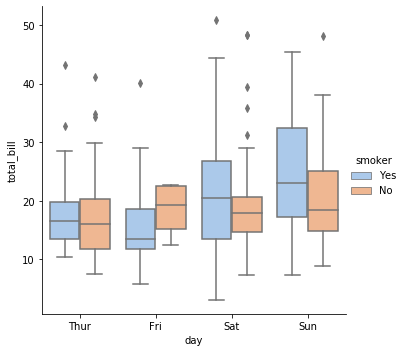

In [155]:
# Gráfico de Boxplot dos dias por total de conta e (hue, subdivisão) se a pessoa é fumante ou não.

sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

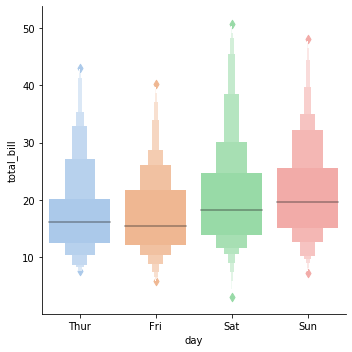

In [160]:
# Tipo de Boxplot com foco maior na forma dos dados do que nos outliers.
# Esse tipo de gráfico é interessante quando temos grandes datasets.
'''
    kind = 'boxen'
    Ele nos faz essa representação utilizando o volume
'''

sns.catplot(x="day", y="total_bill", kind="boxen", data=tips);

#### Combinando gráficos
    Podemos combinar gráficos para ter mais informação.


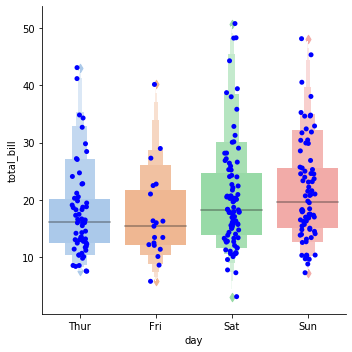

In [161]:
# O Método stripplot permite plotar a distribuição dos dados.

sns.catplot(x="day", y="total_bill", kind="boxen", data=tips);
sns.stripplot(x="day", y="total_bill", data=tips, color="blue");

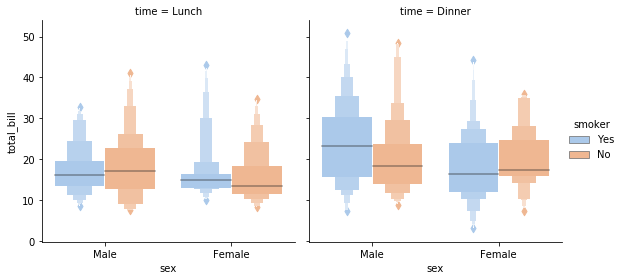

In [166]:
# .catplot() permite combinarmos gráficos em uma única figura.

sns.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="boxen",height=4);

### Gráficos de Correlação
    Útil para visualizar se existem correlações positivas ou negativas entre colunas.
    .corr() do pandas possibilita calcular correlação por tipo spearman ou pearson

In [175]:
correlacoes = tips.corr()
correlacoes

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


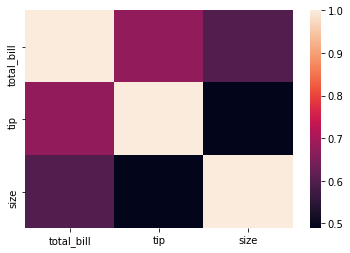

In [178]:
sns.heatmap(correlacoes)

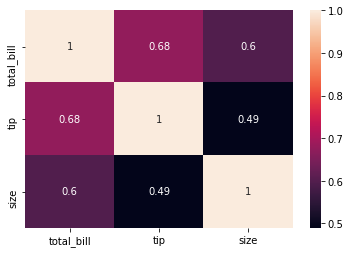

In [180]:
# Exibe os valores de correlação

sns.heatmap(correlacoes, annot=True)